In [161]:
# from https://www.geeksforgeeks.org/visualize-graphs-in-python/
# First networkx library is imported  
# along with matplotlib 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [162]:
coordinates_file = '../../Fieldwork/QGIS maps/SamplingSites.csv'

In [163]:
options = {
        'node_color': 'pink',
        'node_size': 300,
        # 'width': 3,
        'arrowstyle': '-'#'-|>',
        # 'arrowsize': 12,
    }

def DrawGraph(edges:np.ndarray|list|tuple,title:str=None,savepath:str=None,options=options,edge_labels=None,figsize:tuple=(6.4,4.8),titlesize=12,edge_label_size=12):
    
    G = nx.Graph()
    G.add_edges_from(edges)
    
    pos = nx.spring_layout(G)

    fig, ax = plt.subplots(figsize=figsize)

    nx.draw_networkx(G,pos=pos,arrows=True,**options,ax=ax)

    if edge_labels is not None:
        edge_labels_dict = {}

        for i in range(len(edges)):
            edge_labels_dict[(edges[i][0],edges[i][1])] = edge_labels[i]

        nx.draw_networkx_edge_labels(G, pos,edge_labels_dict,ax=ax,font_size=edge_label_size)

    if title != None:
        ax.set_title(title,fontsize=titlesize)
    if savepath != None:
        fig.savefig(savepath, dpi = 600, facecolor = '#fff', bbox_inches='tight')


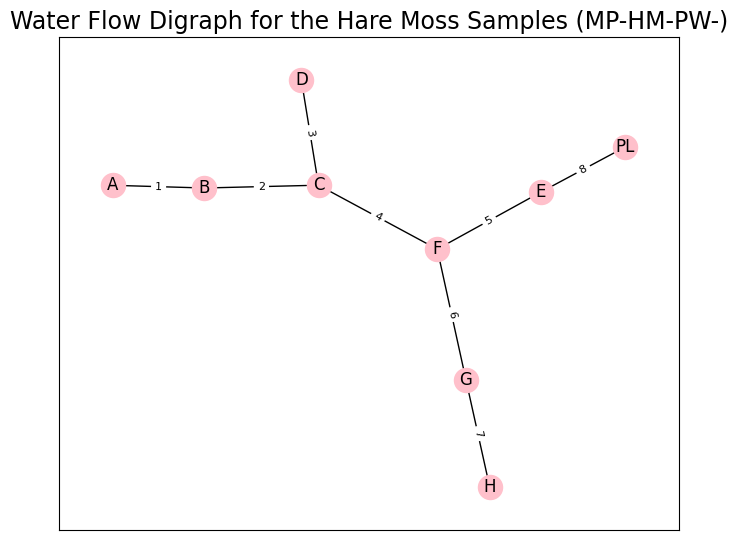

In [178]:
HM_edges = np.array([
    [f'A', f'B'],
    [f'B', f'C'],
    [f'C', f'D'],
    [f'C', f'F'],
    [f'E', f'F'],
    [f'F', f'G'],
    [f'G', f'H'],
    [f'PL', f'E']
])
HM_edges_num = np.arange(len(HM_edges))+1

title='Water Flow Digraph for the Hare Moss Samples (MP-HM-PW-)'
DrawGraph(HM_edges,title=title,edge_labels=HM_edges_num,edge_label_size=8,figsize=(8,6.4),titlesize=17)

In [165]:
HM_nodes = 'HM-PW-' + np.unique(HM_edges)[1:]

for i in range(len(HM_nodes)):
    if 'PW-PL' in HM_nodes[i]: HM_nodes[i] = HM_nodes[i].replace('PW-PL','PL')

HM_edges = 'HM-PW-' + HM_edges
for i in range(len(HM_edges[:,0])):
    for j in range(len(HM_edges[i,:])):
        if 'PW-PL' in HM_edges[i,j]: HM_edges[i,j] = HM_edges[i,j].replace('PW-PL','PL')

idx_l = []

for i in range(len(HM_nodes)):
    idx_l2 = []
    if len(np.where(HM_edges[:,1]==HM_nodes[i])[0])>0:
        idx = np.where(HM_edges[:,1]==HM_nodes[i])[0][0]
        idx_l2.append(int(idx))

        # search up the series of edges
        while HM_edges[idx,0] in HM_edges[:,1]:
            idx = np.where(HM_edges[:,1]==HM_edges[idx,0])[0][0]
            idx_l2.append(int(idx))
    idx_l.append(idx_l2)

In [183]:
HM_nodes_v_edges = np.zeros((len(HM_nodes),len(HM_edges_num)))

for i in range(len(HM_edges_num)):
    HM_nodes_v_edges[i,idx_l[i]] = 1

# HM_nodes_v_edges

In [184]:
HM_edges_num

array([1, 2, 3, 4, 5, 6, 7, 8])

In [185]:
HM_nodes_v_edges

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [188]:
df = pd.DataFrame(HM_nodes_v_edges,columns=HM_edges_num,index=HM_nodes['field_1'].to_numpy())
df

,1,2,3,4,5,6,7,8
HM-PL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HM-PW-A,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
HM-PW-B,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
HM-PW-C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
HM-PW-D,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
HM-PW-E,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
HM-PW-F,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
HM-PW-G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HM-PW-H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
def MatrixPlot(matrix,xticks=None,yticks=None,xlab=None,ylab=None,cmap='binary',title=None,tick_top:bool=True,label_top:bool=True,show_values:bool=True):
    fig = plt.figure()
    ax = fig.add_subplot()

    cmap = plt.get_cmap(cmap).copy()
    cmap.set_bad(color = '#fff', alpha = 1.)
    c = ax.pcolormesh(matrix, cmap=cmap)

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            if matrix[y, x] < np.mean(matrix): c = '#000'
            else: c = '#fff'
            if matrix[y, x] != np.nan and show_values:
                ax.text(x + 0.5, y + 0.5, '%.0f' % matrix[y, x],
                        horizontalalignment='center',
                        verticalalignment='center',
                        c=c
                        )
    if xticks is not None:
        locationsx = np.arange(len(matrix[0,:]))+0.5
        ax.set_xticks(locationsx, xticks)
        
    if tick_top: ax.xaxis.tick_top()

    if yticks is not None:
        locationsy = np.arange(len(matrix[:,0]))+0.5
        ax.set_yticks(locationsy, yticks)
        ax.set_ylim(len(yticks),0)

    if xlab is not None:
        ax.set_xlabel(xlab)
    if label_top: ax.xaxis.set_label_position('top') 
        
    if ylab is not None:
        ax.set_ylabel(ylab)
    if title != None:
        ax.set_title(title)

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (3).

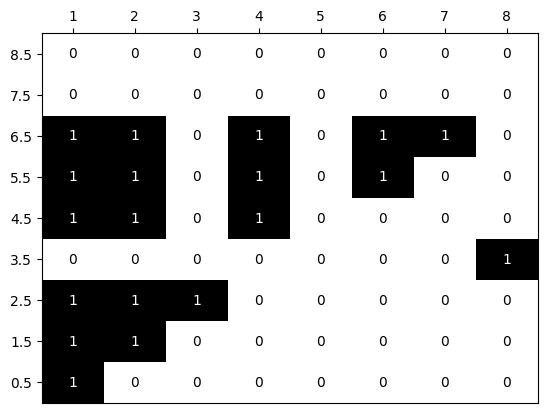

In [190]:
MatrixPlot(HM_nodes_v_edges,HM_edges_num,HM_nodes,'Edges','Nodes')

In [171]:
coord_df = pd.read_csv(coordinates_file)[['field_1','X','Y']]
coord_df

,field_1,X,Y
0,AM-PW-A,322089.0007,656178.2158
1,AM-PW-B,322066.7702,656213.6485
2,AM-PW-C,322042.0482,656251.7644
3,AM-PW-D,322017.1290,656293.8806
4,AM-PW-E,321986.7462,656334.1804
5,HM-PL,320921.4822,656728.5146
6,HM-PW-A,320705.2492,657092.0081
7,HM-PW-B,320804.6408,657022.3268
8,HM-PW-C,320886.7581,656965.4724
9,HM-PW-D,321032.5362,656859.6544


In [172]:
HM_nodes = coord_df[coord_df['field_1'].str.contains("HM")]
AM_nodes = coord_df[coord_df['field_1'].str.contains("AM")]

In [173]:
HM_nodes

,field_1,X,Y
5,HM-PL,320921.4822,656728.5146
6,HM-PW-A,320705.2492,657092.0081
7,HM-PW-B,320804.6408,657022.3268
8,HM-PW-C,320886.7581,656965.4724
9,HM-PW-D,321032.5362,656859.6544
10,HM-PW-E,320917.2726,656718.3493
11,HM-PW-F,320794.7329,656816.8558
12,HM-PW-G,320691.1884,656883.3536
13,HM-PW-H,320594.9094,656954.4688


In [174]:
edge_length = np.zeros(len(HM_edges))
edge_length
for i in range(len(edge_length)):
    p1 = HM_nodes[HM_nodes['field_1'].str.contains(HM_edges[i][0])][['X','Y']].to_numpy()[0]
    p2 = HM_nodes[HM_nodes['field_1'].str.contains(HM_edges[i][1])][['X','Y']].to_numpy()[0]
    edge_length[i] = np.linalg.norm(p1-p2)
edge_length_w = np.min(edge_length)/edge_length #np.ones(len(HM_edges))

In [175]:
HM_nodes_v_edges

array([[1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [176]:
HM_nodes_v_edges_column_centred = np.zeros_like(HM_nodes_v_edges)

for i in range(len(HM_nodes_v_edges[0,:])):
    column = HM_nodes_v_edges[:,i]*edge_length_w
    HM_nodes_v_edges_column_centred[:,i] = (column - np.mean(column))
pd.DataFrame(HM_nodes_v_edges_column_centred)


,0,1,2,3,4,5,6,7
0,0.079311,0.065541,0.057907,-0.125,0.057674,0.046498,0.035008,0.0
1,-0.011330,0.085059,0.077424,-0.125,0.077191,0.066015,0.054525,0.0
2,-0.011330,-0.025100,0.028344,-0.125,-0.032968,-0.044144,-0.055634,0.0
3,-0.011330,-0.025100,-0.032735,-0.125,0.029975,0.018799,0.007309,0.0
4,-0.011330,-0.025100,-0.032735,-0.125,-0.032968,-0.044144,-0.055634,0.0
5,-0.011330,-0.025100,-0.032735,-0.125,-0.032968,0.045264,0.033774,0.0
6,-0.011330,-0.025100,-0.032735,-0.125,-0.032968,-0.044144,0.036286,0.0
7,-0.011330,-0.025100,-0.032735,0.875,-0.032968,-0.044144,-0.055634,0.0


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (9).

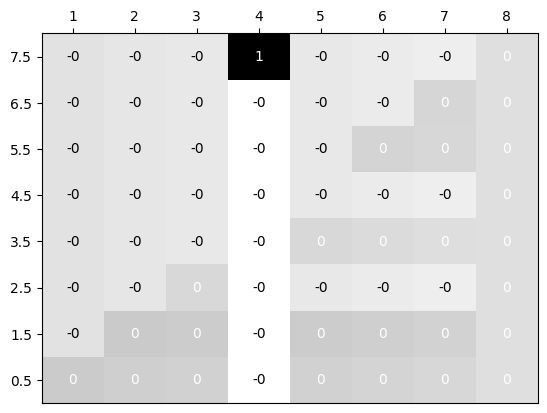

In [177]:

MatrixPlot(HM_nodes_v_edges_column_centred,HM_edges_num,HM_nodes['field_1'].to_numpy(),'Edges','Nodes')

In [ ]:
U, S, Vh= np.linalg.svd(HM_nodes_v_edges_column_centred)
U[np.where(np.abs(U)<1e-3)] = 0
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.035827,-0.503921,-0.509841,-0.184038,0.241909,0.546818,0.048756,-0.012427,0.001000,0.000000,0.301511
1,-0.033286,-0.428030,-0.287933,-0.035659,-0.132501,-0.771553,-0.123057,0.091803,-0.063893,-0.009643,0.301511
2,0.242424,0.185181,-0.030453,-0.212117,-0.140498,-0.020032,0.026447,0.055452,0.854516,0.126471,0.301511
3,-0.030652,-0.090204,0.027519,0.521559,-0.626028,0.190717,0.430387,0.097363,-0.064479,-0.008880,0.301511
4,-0.030745,0.120854,-0.016236,0.481148,0.018701,0.151340,-0.794654,-0.047943,0.037851,-0.057566,0.301511
5,0.242093,0.305062,-0.051219,-0.246852,-0.082858,0.048840,-0.072120,0.229630,-0.427991,0.665959,0.301511
6,-0.869301,0.314440,-0.006617,-0.222047,-0.007805,-0.016483,0.061336,-0.004647,0.017552,-0.027587,0.301511
7,0.302826,0.313354,-0.055594,-0.257303,-0.034241,0.022809,0.026177,0.240232,-0.239556,-0.729674,0.301511
8,0.091765,0.211370,-0.043462,0.443918,0.679946,-0.192993,0.390529,-0.033069,0.018993,0.059166,0.301511
9,0.147678,-0.014833,0.192484,-0.168603,-0.096193,-0.028585,0.041125,-0.889161,-0.137421,-0.018233,0.301511


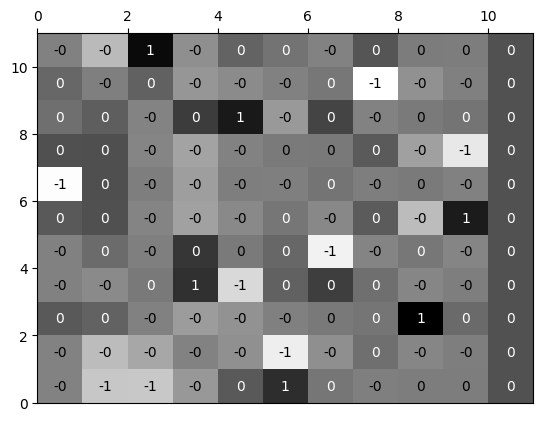

In [ ]:
MatrixPlot(U)

In [ ]:
np.shape(U)

(11, 11)

In [ ]:
HM_edges

array([['0', 'I1'],
       ['I1', 'I2'],
       ['I2', 'E'],
       ['E', 'F'],
       ['F', 'G'],
       ['E', 'D'],
       ['D', 'C'],
       ['C', 'B'],
       ['B', 'A'],
       ['C', 'O1'],
       ['O1', 'O2']], dtype='<U2')

In [ ]:
edge_length = np.zeros(len(HM_edges))
edge_length
for i in range(len(edge_length)):
    p1 = np.array(coord[HM_edges[i][0]])
    p2 = np.array(coord[HM_edges[i][1]])
    edge_length[i] = np.linalg.norm(p1-p2)
edge_length

array([1.        , 1.        , 4.47213595, 1.        , 1.        ,
       6.02079729, 0.5       , 6.40312424, 1.        , 2.        ,
       1.        ])

In [ ]:
HM_edges[0]

array(['0', 'I1'], dtype='<U2')